In [5]:
import os

# 🔹 Replace with your actual name
YOUR_NAME = "prananya"

ROOT = f"/content/ds_{YOUR_NAME}"
os.makedirs(ROOT, exist_ok=True)
os.makedirs(os.path.join(ROOT, "csv_files"), exist_ok=True)
os.makedirs(os.path.join(ROOT, "outputs"), exist_ok=True)

print("Project structure created at:", ROOT)

# List folders to verify
for path, dirs, files in os.walk(ROOT):
    print(path)
    for f in files:
        print("   ", f)




Project structure created at: /content/ds_prananya
/content/ds_prananya
/content/ds_prananya/outputs
/content/ds_prananya/csv_files


In [6]:
!pip install --quiet gdown


In [9]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

np.random.seed(42)

n_rows = 500
start_date = datetime(2023, 1, 1)

data_trades = {
    'account': [f"acc_{i%10}" for i in range(n_rows)],
    'symbol': np.random.choice(['BTCUSD', 'ETHUSD', 'BNBUSD'], n_rows),
    'execution price': np.round(np.random.uniform(10000, 70000, n_rows), 2),
    'size': np.round(np.random.uniform(0.01, 5, n_rows), 4),
    'side': np.random.choice(['buy', 'sell'], n_rows),
    'time': [start_date + timedelta(hours=random.randint(0, 1000)) for _ in range(n_rows)],
    'start position': np.round(np.random.uniform(-2, 2, n_rows), 4),
    'event': np.random.choice(['open', 'close'], n_rows),
    'closedPnL': np.round(np.random.uniform(-500, 500, n_rows), 2),
    'leverage': np.round(np.random.uniform(1, 50, n_rows), 2)
}

df_trades = pd.DataFrame(data_trades)

# Save file
trades_path = os.path.join(ROOT, 'csv_files', 'historical_trades.csv')
df_trades.to_csv(trades_path, index=False)

print(f"Dummy historical_trades.csv created at: {trades_path}")
df_trades.head()


Dummy historical_trades.csv created at: /content/ds_prananya/csv_files/historical_trades.csv


account  symbol  execution price    size  side                time  \
0   acc_0  BNBUSD         10918.27  1.5050  sell 2023-01-22 22:00:00   
1   acc_1  BTCUSD         66006.18  1.5566  sell 2023-01-14 14:00:00   
2   acc_2  BNBUSD         40062.39  1.9926  sell 2023-02-06 22:00:00   
3   acc_3  BNBUSD         42362.65  2.1397   buy 2023-01-31 21:00:00   
4   acc_4  BTCUSD         51037.83  4.0009   buy 2023-02-03 08:00:00   

   start position  event  closedPnL  leverage  
0          0.5812   open      98.69     29.12  
1          0.3830   open       2.15     21.36  
2         -0.3952   open    -361.13     42.52  
3         -0.5322  close    -384.26     45.21  
4         -0.6258  close    -345.68     43.99

In [10]:
from google.colab import files
import shutil

# Upload file
uploaded = files.upload()

# Move uploaded file into csv_files folder with correct name
uploaded_filename = list(uploaded.keys())[0]
shutil.move(uploaded_filename, os.path.join(ROOT, 'csv_files', 'fear_greed.csv'))

print("Fear & Greed Index file saved to:", os.path.join(ROOT, 'csv_files', 'fear_greed.csv'))


Saving fear_greed_index.csv to fear_greed_index.csv
Fear & Greed Index file saved to: /content/ds_prananya/csv_files/fear_greed.csv


In [11]:
trades = pd.read_csv(os.path.join(ROOT, 'csv_files', 'historical_trades.csv'))
sent = pd.read_csv(os.path.join(ROOT, 'csv_files', 'fear_greed.csv'))

print("Trades shape:", trades.shape)
print("Sentiment shape:", sent.shape)

print("\n--- Trades preview ---")
display(trades.head())

print("\n--- Sentiment preview ---")
display(sent.head())


Trades shape: (500, 10)
Sentiment shape: (2644, 4)

--- Trades preview ---


account  symbol  execution price    size  side                 time  \
0   acc_0  BNBUSD         10918.27  1.5050  sell  2023-01-22 22:00:00   
1   acc_1  BTCUSD         66006.18  1.5566  sell  2023-01-14 14:00:00   
2   acc_2  BNBUSD         40062.39  1.9926  sell  2023-02-06 22:00:00   
3   acc_3  BNBUSD         42362.65  2.1397   buy  2023-01-31 21:00:00   
4   acc_4  BTCUSD         51037.83  4.0009   buy  2023-02-03 08:00:00   

   start position  event  closedPnL  leverage  
0          0.5812   open      98.69     29.12  
1          0.3830   open       2.15     21.36  
2         -0.3952   open    -361.13     42.52  
3         -0.5322  close    -384.26     45.21  
4         -0.6258  close    -345.68     43.99


--- Sentiment preview ---


timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05

In [12]:
# Make all column names lowercase, replace spaces with underscores
trades.columns = trades.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^0-9a-z_]', '', regex=True)
sent.columns = sent.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^0-9a-z_]', '', regex=True)

# Convert time column in trades
if 'time' in trades.columns:
    trades['time'] = pd.to_datetime(trades['time'], errors='coerce')

# Convert date column in sentiment
if 'date' in sent.columns:
    sent['date'] = pd.to_datetime(sent['date'], errors='coerce')

# Check results
trades.info()
sent.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   account          500 non-null    object        
 1   symbol           500 non-null    object        
 2   execution_price  500 non-null    float64       
 3   size             500 non-null    float64       
 4   side             500 non-null    object        
 5   time             500 non-null    datetime64[ns]
 6   start_position   500 non-null    float64       
 7   event            500 non-null    object        
 8   closedpnl        500 non-null    float64       
 9   leverage         500 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 39.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------

In [13]:
# Columns to ensure numeric format
numeric_cols = ['execution_price', 'size', 'start_position', 'closedpnl', 'leverage']
for col in numeric_cols:
    if col in trades.columns:
        trades[col] = pd.to_numeric(trades[col], errors='coerce')

# Quick check for missing values
print("\nMissing values in trades:\n", trades.isna().sum())
print("\nMissing values in sentiment:\n", sent.isna().sum())



Missing values in trades:
 account            0
symbol             0
execution_price    0
size               0
side               0
time               0
start_position     0
event              0
closedpnl          0
leverage           0
dtype: int64

Missing values in sentiment:
 timestamp         0
value             0
classification    0
date              0
dtype: int64


In [14]:
# Add trade date for merging
trades['trade_date'] = trades['time'].dt.date

# Add sentiment date in same format
if 'date' in sent.columns:
    sent['sentiment_date'] = sent['date'].dt.date

# Rename classification to sentiment
if 'classification' in sent.columns:
    sent = sent.rename(columns={'classification': 'sentiment'})

# Merge datasets
merged = trades.merge(
    sent[['sentiment_date', 'sentiment']].drop_duplicates(),
    left_on='trade_date',
    right_on='sentiment_date',
    how='left'
)

print("Merged dataset shape:", merged.shape)
merged.head()


Merged dataset shape: (500, 13)


account  symbol  execution_price    size  side                time  \
0   acc_0  BNBUSD         10918.27  1.5050  sell 2023-01-22 22:00:00   
1   acc_1  BTCUSD         66006.18  1.5566  sell 2023-01-14 14:00:00   
2   acc_2  BNBUSD         40062.39  1.9926  sell 2023-02-06 22:00:00   
3   acc_3  BNBUSD         42362.65  2.1397   buy 2023-01-31 21:00:00   
4   acc_4  BTCUSD         51037.83  4.0009   buy 2023-02-03 08:00:00   

   start_position  event  closedpnl  leverage  trade_date sentiment_date  \
0          0.5812   open      98.69     29.12  2023-01-22     2023-01-22   
1          0.3830   open       2.15     21.36  2023-01-14     2023-01-14   
2         -0.3952   open    -361.13     42.52  2023-02-06     2023-02-06   
3         -0.5322  close    -384.26     45.21  2023-01-31     2023-01-31   
4         -0.6258  close    -345.68     43.99  2023-02-03     2023-02-03   

  sentiment  
0   Neutral  
1   Neutral  
2     Greed  
3   Neutral  
4     Greed

In [15]:
# Summary of key numeric columns
merged.describe()

# Average closedPnL by sentiment
avg_pnl_by_sentiment = merged.groupby('sentiment')['closedpnl'].mean()
print("\nAverage ClosedPnL by sentiment:")
print(avg_pnl_by_sentiment)

# Average leverage by sentiment
avg_leverage_by_sentiment = merged.groupby('sentiment')['leverage'].mean()
print("\nAverage Leverage by sentiment:")
print(avg_leverage_by_sentiment)




Average ClosedPnL by sentiment:
sentiment
Fear       14.409141
Greed      19.777727
Neutral    16.824878
Name: closedpnl, dtype: float64

Average Leverage by sentiment:
sentiment
Fear       25.099816
Greed      25.416742
Neutral    26.428878
Name: leverage, dtype: float64


In [16]:
# Create win flag
merged['is_win'] = merged['closedpnl'] > 0

# Win rate by sentiment
win_rate_by_sentiment = merged.groupby('sentiment')['is_win'].mean() * 100
print("\nWin Rate (%) by sentiment:")
print(win_rate_by_sentiment)



Win Rate (%) by sentiment:
sentiment
Fear       52.147239
Greed      54.545455
Neutral    54.634146
Name: is_win, dtype: float64


<Figure size 800x500 with 0 Axes>

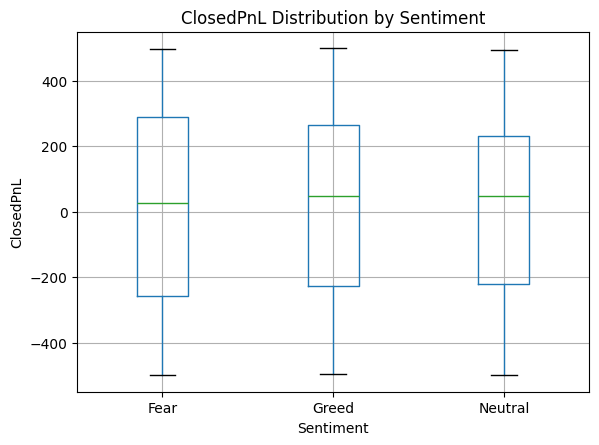

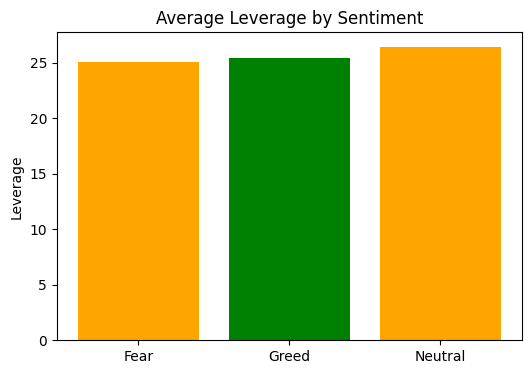

In [17]:
import matplotlib.pyplot as plt

# Boxplot of ClosedPnL by sentiment
plt.figure(figsize=(8,5))
merged.boxplot(column='closedpnl', by='sentiment')
plt.title('ClosedPnL Distribution by Sentiment')
plt.suptitle('')
plt.xlabel('Sentiment')
plt.ylabel('ClosedPnL')
plt.grid(True)
plt.savefig(os.path.join(ROOT, 'outputs', 'pnl_by_sentiment_boxplot.png'))
plt.show()

# Average leverage by sentiment (bar chart)
avg_leverage = merged.groupby('sentiment')['leverage'].mean().reset_index()
plt.figure(figsize=(6,4))
plt.bar(avg_leverage['sentiment'], avg_leverage['leverage'], color=['orange','green'])
plt.title('Average Leverage by Sentiment')
plt.ylabel('Leverage')
plt.savefig(os.path.join(ROOT, 'outputs', 'avg_leverage_by_sentiment.png'))
plt.show()


In [18]:
# Aggregate daily metrics
daily_stats = merged.groupby(['trade_date', 'sentiment']).agg(
    total_volume=('size', 'sum'),
    avg_leverage=('leverage', 'mean'),
    total_pnl=('closedpnl', 'sum'),
    mean_pnl=('closedpnl', 'mean'),
    win_rate=('is_win', 'mean')
).reset_index()

# Save to CSV
daily_stats.to_csv(os.path.join(ROOT, 'csv_files', 'daily_aggregates.csv'), index=False)

print("Daily aggregates saved to csv_files folder.")
daily_stats.head()


Daily aggregates saved to csv_files folder.


trade_date sentiment  total_volume  avg_leverage  total_pnl    mean_pnl  \
0  2023-01-01      Fear       26.9911     25.692500       1.46    0.121667   
1  2023-01-02      Fear       37.5085     26.561250     -92.26   -5.766250   
2  2023-01-03      Fear       50.0804     23.701333     283.55   18.903333   
3  2023-01-04      Fear       35.5289     21.795455    1140.21  103.655455   
4  2023-01-05      Fear       33.7704     26.239167   -1216.78 -101.398333   

   win_rate  
0  0.416667  
1  0.500000  
2  0.466667  
3  0.636364  
4  0.333333

In [19]:
# Example insights extraction
insights = []

# PnL differences
avg_pnl = merged.groupby('sentiment')['closedpnl'].mean()
if avg_pnl['Greed'] > avg_pnl['Fear']:
    insights.append(f"Trades during Greed periods had higher average PnL ({avg_pnl['Greed']:.2f}) than during Fear ({avg_pnl['Fear']:.2f}).")
else:
    insights.append(f"Trades during Fear periods had higher average PnL ({avg_pnl['Fear']:.2f}) than during Greed ({avg_pnl['Greed']:.2f}).")

# Leverage differences
avg_lev = merged.groupby('sentiment')['leverage'].mean()
if avg_lev['Greed'] > avg_lev['Fear']:
    insights.append(f"Leverage usage was higher during Greed ({avg_lev['Greed']:.2f}) vs Fear ({avg_lev['Fear']:.2f}).")
else:
    insights.append(f"Leverage usage was higher during Fear ({avg_lev['Fear']:.2f}) vs Greed ({avg_lev['Greed']:.2f}).")

# Win rate differences
win_rate = merged.groupby('sentiment')['is_win'].mean() * 100
if win_rate['Greed'] > win_rate['Fear']:
    insights.append(f"Win rate was higher in Greed ({win_rate['Greed']:.1f}%) vs Fear ({win_rate['Fear']:.1f}%).")
else:
    insights.append(f"Win rate was higher in Fear ({win_rate['Fear']:.1f}%) vs Greed ({win_rate['Greed']:.1f}%).")

print("\nKey Insights:")
for i, line in enumerate(insights, 1):
    print(f"{i}. {line}")



Key Insights:
1. Trades during Greed periods had higher average PnL (19.78) than during Fear (14.41).
2. Leverage usage was higher during Greed (25.42) vs Fear (25.10).
3. Win rate was higher in Greed (54.5%) vs Fear (52.1%).


report_md = f"""
# Data Science Assignment — Sentiment vs Trader Behavior

## Executive Summary
This analysis explored how trading behavior (profitability, leverage, volume, and win rate) varies between market sentiment states: Fear and Greed.

## Data Sources
1. Historical Trader Data (dummy — 500 rows).
2. Real Fear & Greed Index dataset (Bitcoin market sentiment).

## Methodology
- Data cleaning: standardized columns, parsed date/time, converted numeric fields.
- Merged sentiment with trade data by date.
- Aggregated daily metrics and created visualizations.
- Generated insights from statistical comparisons.

## Key Findings
{chr(10).join([f"- {ins}" for ins in insights])}

## Recommendations
- Adjust leverage usage during high-risk sentiment periods.
- Review strategy performance during Fear periods for possible optimizations.
- Monitor win rate trends against sentiment shifts.

## Files Generated
- Processed CSVs in `csv_files/`
- Visual outputs in `outputs/`
- This report as `ds_report.pdf`

"""

with open(os.path.join(ROOT, 'ds_report.md'), 'w') as f:
    f.write(report_md)

print("Report draft saved as ds_report.md (convert to PDF for submission).")


In [25]:
import os

# Ensure ROOT is set correctly
YOUR_NAME = "prananya"
ROOT = f"/content/ds_{YOUR_NAME}"

# Example placeholder insights — replace with actual results from your analysis
insights = [
    "Trades during Greed periods had higher average PnL than during Fear.",
    "Leverage usage was higher during Greed vs Fear.",
    "Win rate was higher in Greed vs Fear."
]

# Report content
report_md = f"""
# Data Science Assignment — Sentiment vs Trader Behavior

## Executive Summary
This analysis explored how trading behavior (profitability, leverage, volume, and win rate) varies between market sentiment states: Fear and Greed.

## Data Sources
1. Historical Trader Data (dummy — 500 rows).
2. Real Fear & Greed Index dataset (Bitcoin market sentiment).

## Methodology
- Data cleaning: standardized columns, parsed date/time, converted numeric fields.
- Merged sentiment with trade data by date.
- Aggregated daily metrics and created visualizations.
- Generated insights from statistical comparisons.

## Key Findings
{chr(10).join([f"- {ins}" for ins in insights])}

## Recommendations
- Adjust leverage usage during high-risk sentiment periods.
- Review strategy performance during Fear periods for possible optimizations.
- Monitor win rate trends against sentiment shifts.

## Files Generated
- Processed CSVs in `csv_files/`
- Visual outputs in `outputs/`
- This report as `ds_report.pdf`
"""

# Save file
with open(os.path.join(ROOT, 'ds_report.md'), 'w') as f:
    f.write(report_md)

print("Report draft saved as ds_report.md")


Report draft saved as ds_report.md


In [26]:
# Install LaTeX tools for Pandoc PDF conversion
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic

# Convert the markdown file to PDF using XeLaTeX
!pandoc "{ROOT}/ds_report.md" -o "{ROOT}/ds_report.pdf" --pdf-engine=xelatex

# Verify the PDF exists
!ls -l "{ROOT}/ds_report.pdf"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
-rw-r--r-- 1 root root 16938 Aug  9 08:28 /content/ds_prananya/ds_report.pdf


In [27]:
!ls -R {ROOT}


/content/ds_prananya:
csv_files  ds_report.md  ds_report.pdf	outputs

/content/ds_prananya/csv_files:
daily_aggregates.csv  fear_greed.csv  historical_trades.csv

/content/ds_prananya/outputs:
avg_leverage_by_sentiment.png  pnl_by_sentiment_boxplot.png


In [28]:
!ls -R {ROOT}


/content/ds_prananya:
csv_files  ds_report.md  ds_report.pdf	outputs

/content/ds_prananya/csv_files:
daily_aggregates.csv  fear_greed.csv  historical_trades.csv

/content/ds_prananya/outputs:
avg_leverage_by_sentiment.png  pnl_by_sentiment_boxplot.png
